In [170]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image as displayImage
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

from sklearn import metrics

from IPython.display import display
from PIL import Image
from sklearn.tree._tree import TREE_LEAF
import time

import seaborn as sns
import pydotplus

%matplotlib inline



#                                       Spotify Song Attributes

In [171]:
data = pd.read_csv('data/data.csv')

In [172]:
data.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [173]:
train, test = train_test_split(data, test_size=0.15)

In [174]:
def concentrationMaker(classifier, name):
    testScore = classifier.score(x_test, y_test)
    trainingScore = classifier.score(x_train, y_train)
    trainingError = 1 - trainingScore
    testingError = 1 - testScore
    print("Analysis of {}: \n".format(name))
    print("Testing Score: {} and Training Score: {}".format(testScore, trainingScore))
    print("Training Error: {}".format(trainingError))
    print("Testing Error: {}".format(testingError))
    y_pred = classifier.predict(x_test)
    n = len(y_test)
    print("Confusion Matrix")
    mat = metrics.confusion_matrix(y_test, y_pred)
    print(mat)
    print("Total: ", n)
    print("Correct Positives ", mat[0][0])
    print("Correct Negatives ", mat[1][1])
    print("False Positives: ", mat[0][1])
    print("False Negatives: ", mat[1][0])

In [175]:

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
  
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    


    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [176]:
def makeLearningCurve(classifier, name):
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    plot_learning_curve(classifier, name, x_train, y_train, (0.01, 1.01), cv=cv, n_jobs=4)

In [177]:
print ("Training: {} and Test: {}".format(len(train), len(test)))

Training: 1714 and Test: 303


# DECISION TREE

In [178]:
c = DecisionTreeClassifier(min_samples_split=100)

In [179]:
#acousticness	danceability	duration_ms	energy	instrumentalness	key	liveness	loudness	mode	speechiness	tempo	time_signature	valence	target
features = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'valence', 'loudness', 'speechiness', 'tempo']
x_train = train[features]
y_train = train['target']

x_test = test[features]
y_test = test['target']









In [180]:
t1 = time.time()
dt = c.fit(x_train, y_train)
t2 = time.time()
print("Training time of Decision Tree w/o pruning: ", (t2 - t1))


Training time of Decision Tree w/o pruning:  0.04787111282348633


Decison Tree


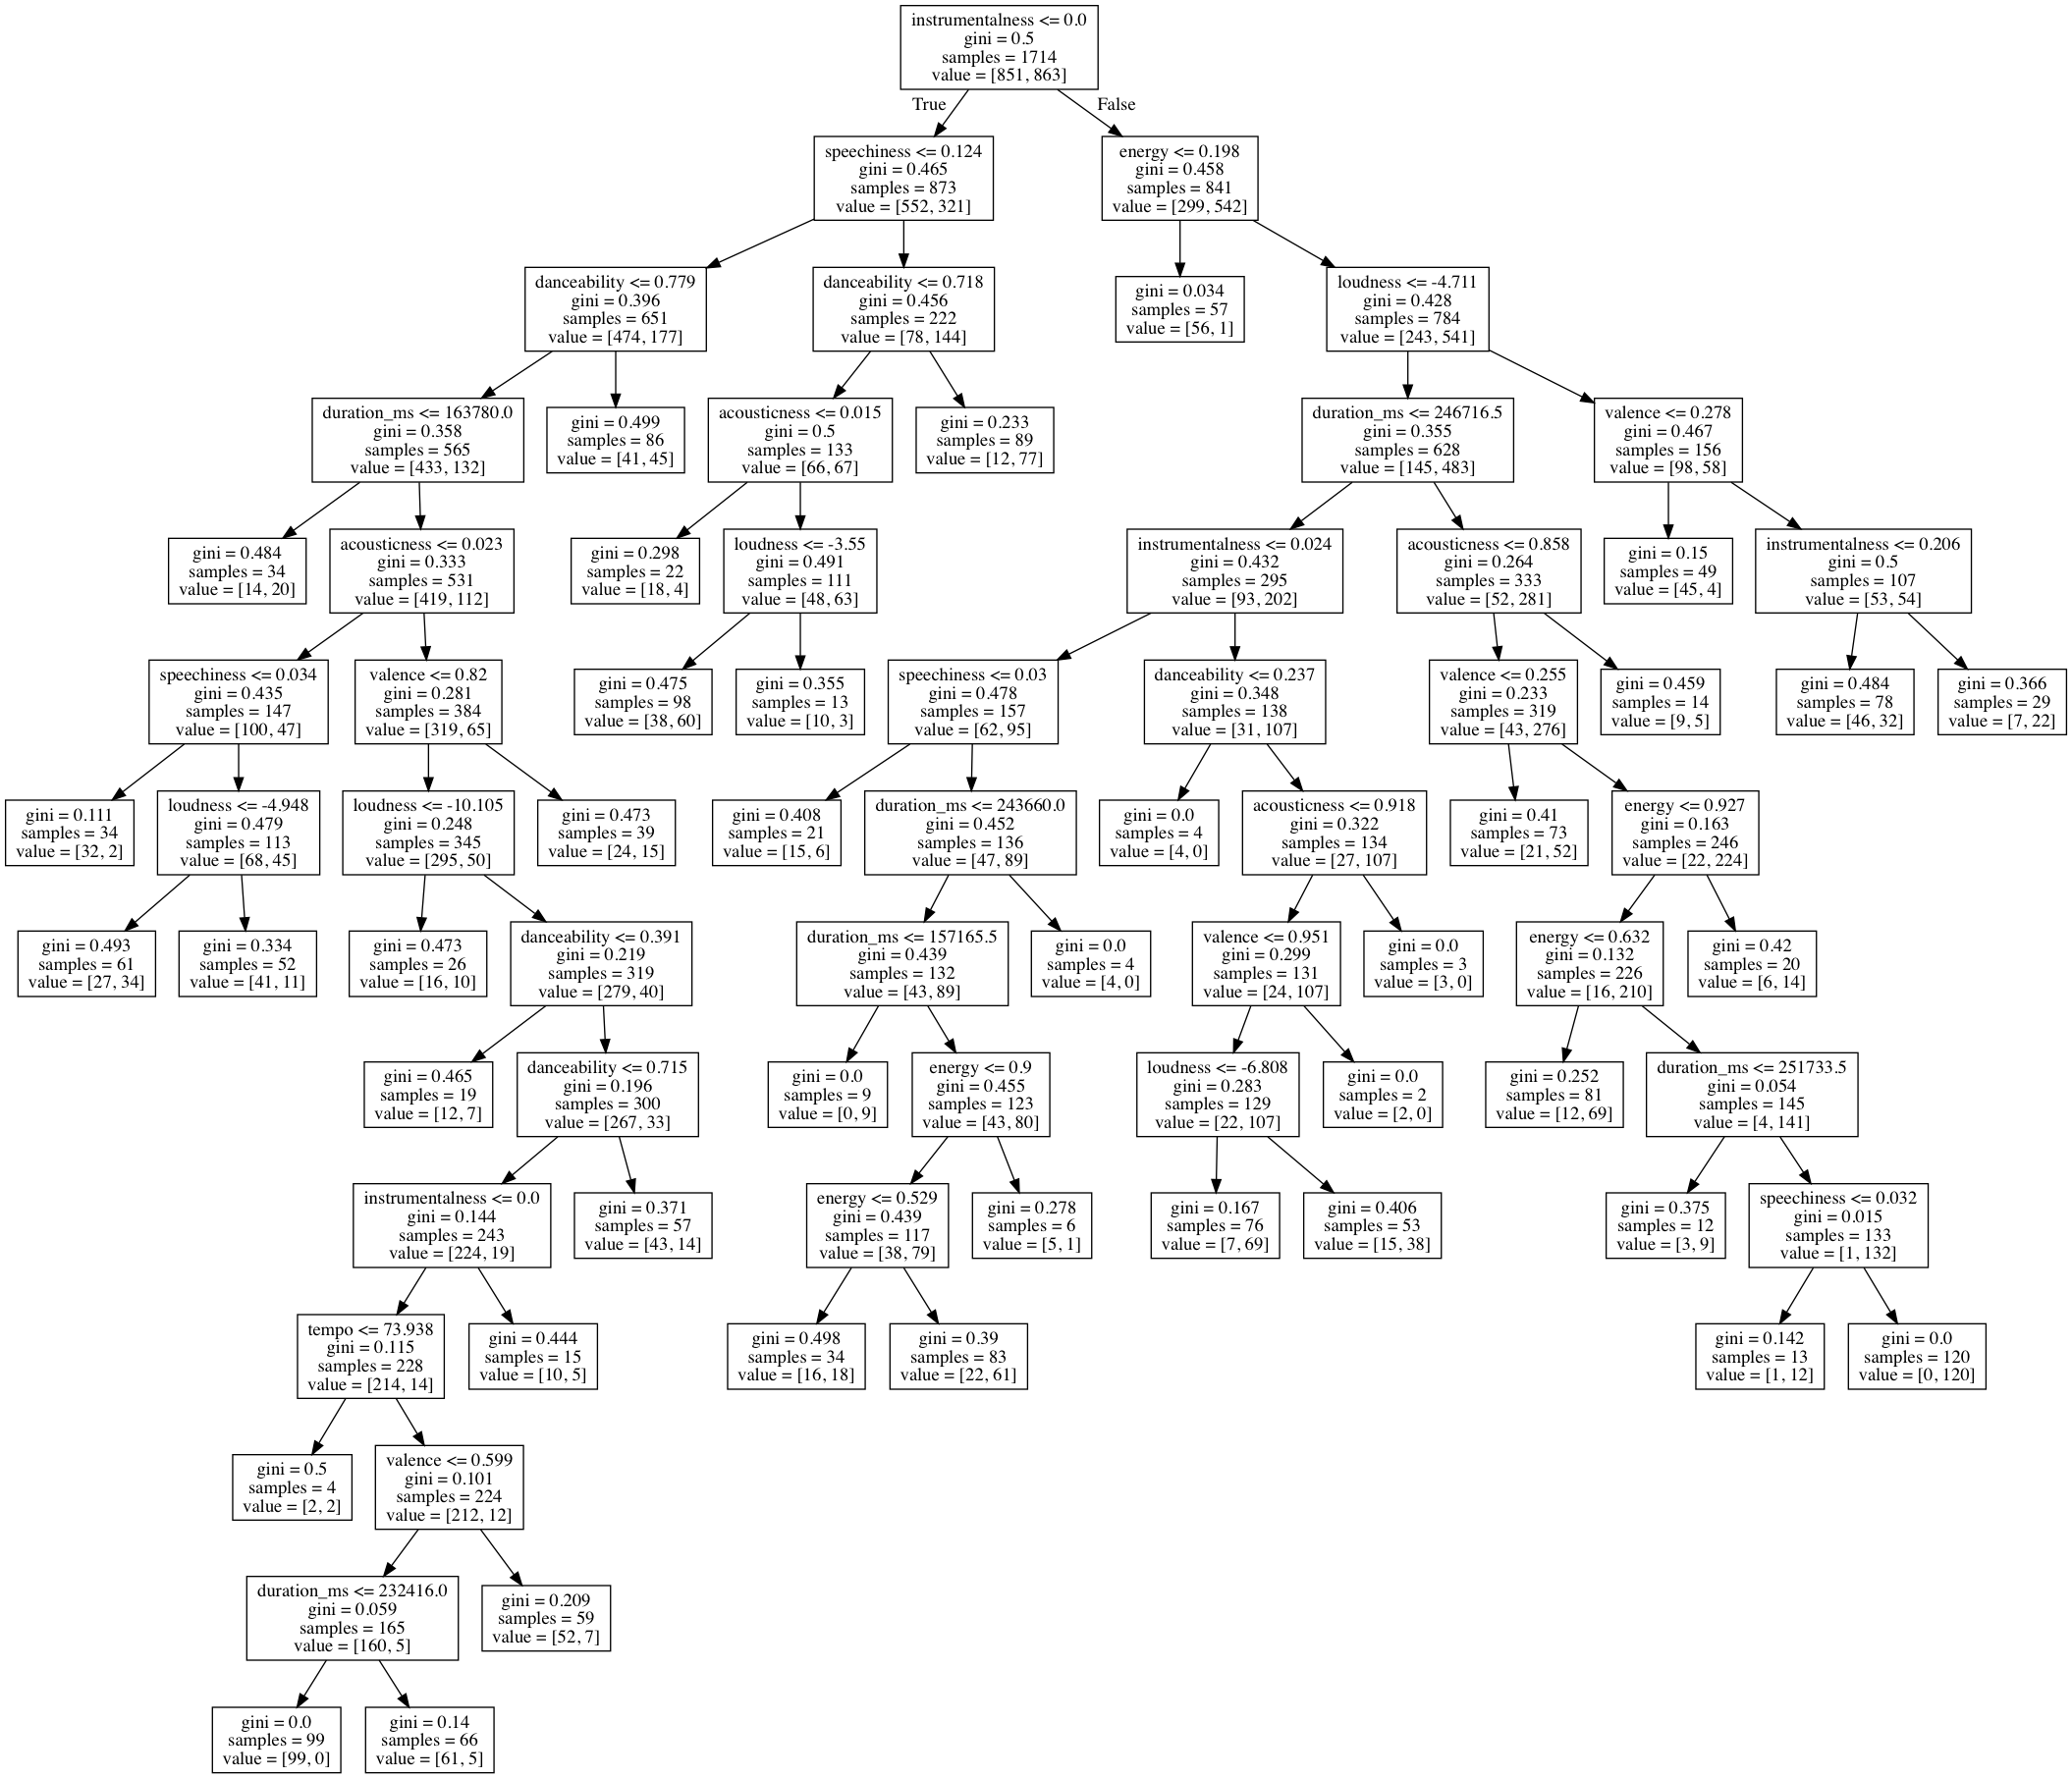

In [181]:
print ("Decison Tree")
dot_data = tree.export_graphviz(dt, out_file = None, feature_names = features, class_names=None)
graph = pydotplus.graph_from_dot_data(dot_data)
displayImage(graph.create_png)
path = "DT.png"
graph.write_png("DT.png")

display(Image.open(path))


In [182]:
concentrationMaker(dt, "Decision Tree Without Pruning")

Analysis of Decision Tree Without Pruning: 

Testing Score: 0.7293729372937293 and Training Score: 0.780630105017503
Training Error: 0.21936989498249704
Testing Error: 0.2706270627062707
Confusion Matrix
[[ 98  48]
 [ 34 123]]
Total:  303
Correct Positives  98
Correct Negatives  123
False Positives:  48
False Negatives:  34


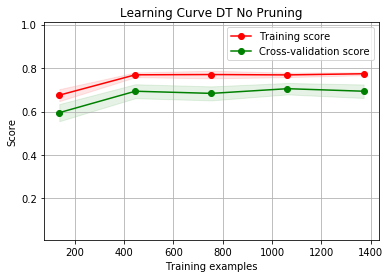

In [183]:
makeLearningCurve(dt, "Learning Curve DT No Pruning")

In [184]:
def prune_index(inner_tree, index, threshold):
    if inner_tree.value[index].min() < threshold:
        # turn node into a leaf by "unlinking" its children
        inner_tree.children_left[index] = TREE_LEAF
        inner_tree.children_right[index] = TREE_LEAF
    # if there are shildren, visit them as well
    if inner_tree.children_left[index] != TREE_LEAF:
        prune_index(inner_tree, inner_tree.children_left[index], threshold)
        prune_index(inner_tree, inner_tree.children_right[index], threshold)

Pruned Decision Tree


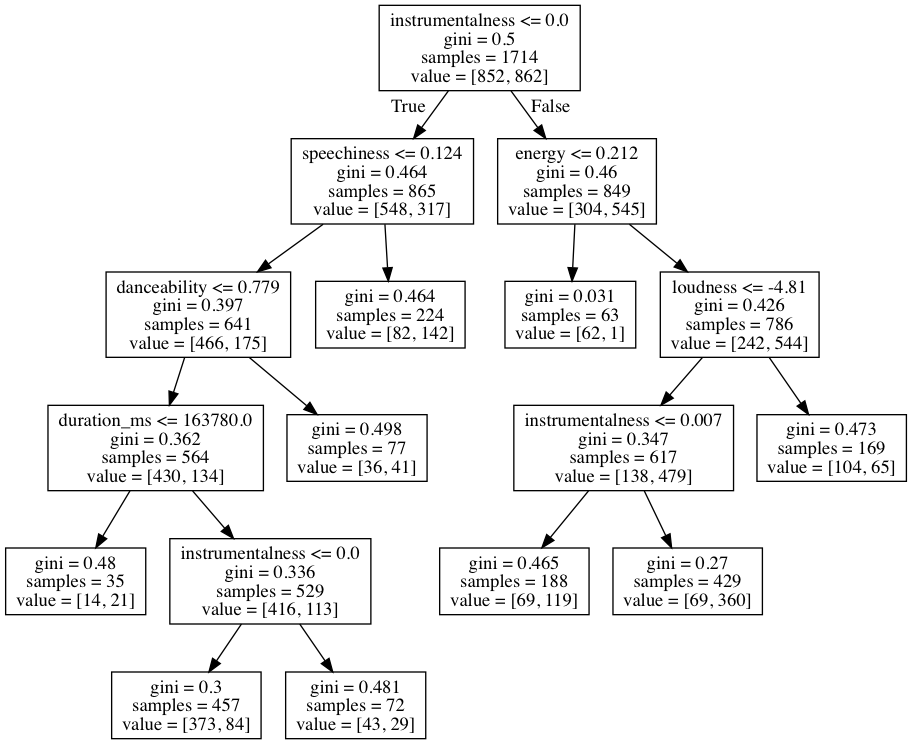

In [135]:
#pruning


prune_index(dt.tree_, 0, 100)
dot_data = tree.export_graphviz(dt, out_file = None, feature_names = features, class_names=None)
graph = pydotplus.graph_from_dot_data(dot_data)


displayImage(graph.create_png)
path = "PrunedDT.png"
graph.write_png("PrunedDT.png")





print("Pruned Decision Tree")

display(Image.open(path))




In [185]:
concentrationMaker(dt, "Decision Tree With Pruning")

Analysis of Decision Tree With Pruning: 

Testing Score: 0.7293729372937293 and Training Score: 0.780630105017503
Training Error: 0.21936989498249704
Testing Error: 0.2706270627062707
Confusion Matrix
[[ 98  48]
 [ 34 123]]
Total:  303
Correct Positives  98
Correct Negatives  123
False Positives:  48
False Negatives:  34


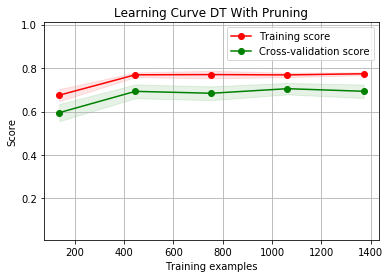

In [186]:
makeLearningCurve(dt, "Learning Curve DT With Pruning")

OverPruned Decision Tree


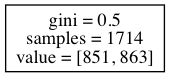

In [187]:
prune_index(dt.tree_, 0, 2000)
dot_data = tree.export_graphviz(dt, out_file = None, feature_names = features, class_names=None)
graph = pydotplus.graph_from_dot_data(dot_data)
displayImage(graph.create_png)
path = "OverPrunedDT.png"
graph.write_png("OverPrunedDT.png")





print("OverPruned Decision Tree")

display(Image.open(path))

In [188]:
concentrationMaker(dt, "Decision Tree With Too Much Pruning")

Analysis of Decision Tree With Too Much Pruning: 

Testing Score: 0.5181518151815182 and Training Score: 0.5035005834305718
Training Error: 0.4964994165694282
Testing Error: 0.4818481848184818
Confusion Matrix
[[  0 146]
 [  0 157]]
Total:  303
Correct Positives  0
Correct Negatives  157
False Positives:  146
False Negatives:  0


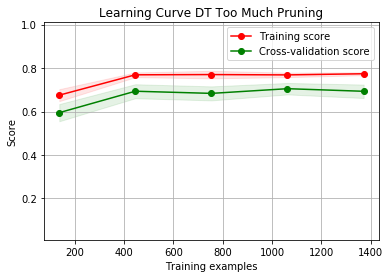

In [189]:
makeLearningCurve(dt, "Learning Curve DT Too Much Pruning")

# IMPLEMENTING NEURAL NETWORK

Best Score:  0.5233372228704785
Optimal Layers:  13


Text(0.5, 1.0, 'Neural layers vs. Testing Scores')

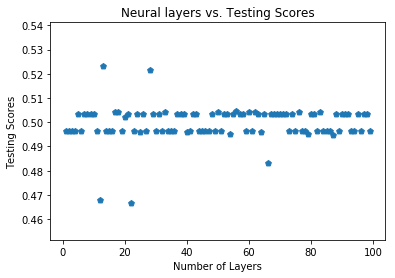

In [219]:
layers = []
runningTimes = []
trainingScores = []
bestTrainingScore = 0.0
indexOfBestScore = 0
training = []

for i in range(1, 100):
    mlp0 = MLPClassifier(hidden_layer_sizes=i, random_state=5, max_iter = 500)
    t1 = time.time()
    mlp0.fit(x_train,y_train)
    t2 = time.time()
    trainingScore = mlp0.score(x_train, y_train)
    if trainingScore > bestTrainingScore:
        bestTrainingScore = trainingScore
        indexOfBestScore = i
    layers.append(i)
    runningTimes.append((t2-t1))
    trainingScores.append(trainingScore)
    score = mlp0.score(x_train, y_train)
    training.append(score)
print("Best Score: ", bestTrainingScore)
print("Optimal Layers: ", indexOfBestScore)
plt.scatter(layers, trainingScores, marker='p')
plt.xlabel("Number of Layers")
plt.ylabel("Testing Scores")
plt.title("Neural layers vs. Testing Scores")


Text(0.5, 1.0, 'Neural layers vs. Training Scores')

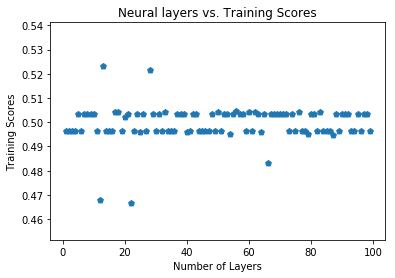

In [220]:
plt.scatter(layers, training, marker='p')
plt.xlabel("Number of Layers")
plt.ylabel("Training Scores")
plt.title("Neural layers vs. Training Scores")

Text(0.5, 1.0, 'Neural layers vs. Training Times')

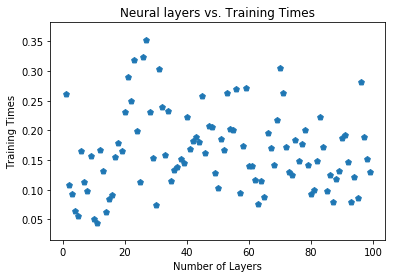

In [212]:
plt.scatter(layers, runningTimes, marker='p')
plt.xlabel("Number of Layers")
plt.ylabel("Training Times")
plt.title("Neural layers vs. Training Times")

In [216]:
mlp0 = MLPClassifier(hidden_layer_sizes=indexOfBestScore, random_state=5)
t1 = time.time()
mlp0.fit(x_train, y_train)
t2 = time.time()
concentrationMaker(mlp0, "Neural Network With {} layers".format(indexOfBestScore))
print("Training Time of Neural Net With {} layers: {}".format(indexOfBestScore, (t2 -t1)))


Analysis of Neural Network With 13 layers: 

Testing Score: 0.5643564356435643 and Training Score: 0.5233372228704785
Training Error: 0.47666277712952154
Testing Error: 0.4356435643564357
Confusion Matrix
[[75 71]
 [61 96]]
Total:  303
Correct Positives  75
Correct Negatives  96
False Positives:  71
False Negatives:  61
Training Time of Neural Net With 13 layers: 0.34138917922973633


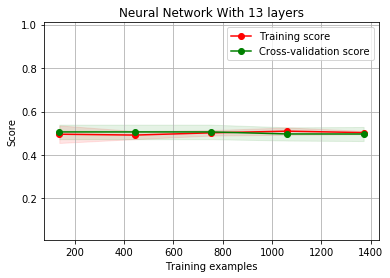

In [218]:
makeLearningCurve(mlp0, "Decion Tree Unboosted", "Neural Network With {} layers".format(indexOfBestScore))

# IMPLEMENTING BOOSTING

In [38]:
c = DecisionTreeClassifier(min_samples_split=100)
t1 = time.time()
c.fit(x_train, y_train)
t2 = time.time()
concentrationMaker(c, "Decision Tree Without Boosting")


Analysis of Decision Tree Without Boosting: 

Testing Score: 0.6732673267326733 and Training Score: 0.7893815635939323
Training Error: 0.2106184364060677
Testing Error: 0.3267326732673267
Confusion Matrix
[[ 89  56]
 [ 43 115]]
Total:  303
Correct Positives  89
Correct Negatives  115
False Positives:  56
False Negatives:  43


In [39]:
print("Training time of unboosted Decision Tree: ", (t2 - t1))

Training time of unboosted Decision Tree:  0.020224571228027344


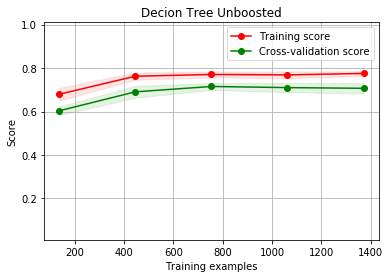

In [40]:
makeLearningCurve(c, "Decion Tree Unboosted")

In [41]:
adb = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=20, learning_rate = 1)
t1 = time.time()
adb.fit(x_train, y_train)
t2 = time.time()
concentrationMaker(adb, "Decision Tree Without Ada Algorithm Boosting")

Analysis of Decision Tree Without Ada Algorithm Boosting: 

Testing Score: 0.6864686468646864 and Training Score: 0.9982497082847142
Training Error: 0.0017502917152858455
Testing Error: 0.31353135313531355
Confusion Matrix
[[ 91  54]
 [ 41 117]]
Total:  303
Correct Positives  91
Correct Negatives  117
False Positives:  54
False Negatives:  41


In [42]:
print("Training time of Decision Tree with ADA Algorithm Boosting: ", (t2 - t1))

Training time of Decision Tree with ADA Algorithm Boosting:  0.16762995719909668


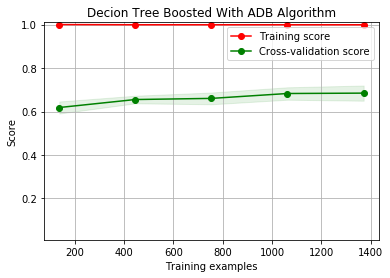

In [221]:
makeLearningCurve(adb, "Decion Tree Boosted With ADB Algorithm")

In [222]:
rf = RandomForestClassifier(n_estimators=20)
t1 = time.time()
rf.fit(x_train, y_train)
t2 = time.time()
concentrationMaker(rf, "Decision Tree With RF Algorithm Boosting")

Analysis of Decision Tree With RF Algorithm Boosting: 

Testing Score: 0.7623762376237624 and Training Score: 0.9970828471411902
Training Error: 0.0029171528588097795
Testing Error: 0.2376237623762376
Confusion Matrix
[[111  35]
 [ 37 120]]
Total:  303
Correct Positives  111
Correct Negatives  120
False Positives:  35
False Negatives:  37


In [45]:
print("Training time of Decision Tree with RF Algorithm Boosting: ", (t2 - t1))

Training time of Decision Tree with RF Algorithm Boosting:  0.10079216957092285


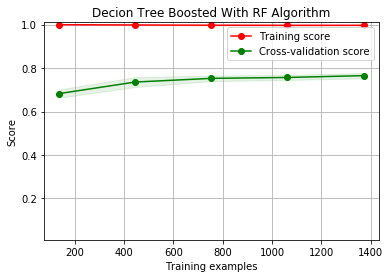

In [46]:
makeLearningCurve(rf, "Decion Tree Boosted With RF Algorithm")

In [47]:
#The algorithm is more accurate nad not as overfit. Can we do better? Voting Classifier. Boosting using several models



#lr = LogisticRegression(solver='lbfgs')
#dt = DecisionTreeClassifier()
#svm = SVC(kernel='poly', degree = 2, gamma='auto')











In [48]:
#evec = VotingClassifier(estimators = [("lr",lr),("dt",dt),("svm", svm)], voting = "hard")

In [49]:
#I had to comment out all this code because it was taking too long to run, but I have seen a video of this running with better accuracy and less overfitting than other models
#evec.fit(x_train.iloc[1:400], y_train.iloc[1:400])
#testingScoreEVEC = evec.score(x_test, y_test)
#trainingScoreEVEC = evec.score(x_train, y_train)
#print("Testing Score: {} and Training Score: {}".format(testingScoreEVEC, trainingScoreEVEC))

# Support Vector Machine (Linear and RBF kernels)

In [50]:
#Support Vector Machine with RBF kernel
mySVMRBF = svm.SVC(gamma = 0.001, C = 100, kernel="rbf")
t1 = time.time()
mySVMRBF.fit(x_train, y_train)
t2 = time.time()

concentrationMaker(mySVMRBF, "Support Vector Machine with RBF kernel")


Analysis of Support Vector Machine with RBF kernel: 

Testing Score: 0.5775577557755776 and Training Score: 0.9982497082847142
Training Error: 0.0017502917152858455
Testing Error: 0.42244224422442245
Confusion Matrix
[[ 54  91]
 [ 37 121]]
Total:  303
Correct Positives  54
Correct Negatives  121
False Positives:  91
False Negatives:  37


In [51]:
print("Training time of SVM with RBF kernel: ", (t2 - t1))

Training time of SVM with RBF kernel:  0.19920706748962402


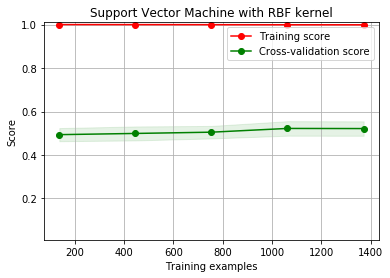

In [52]:
makeLearningCurve(mySVMRBF, "Support Vector Machine with RBF kernel")

In [53]:
#Supporting Vector Machine with Linear Kernel

mySVMSigmoid = svm.SVC(kernel="sigmoid", gamma="scale")

t1 = time.time()
mySVMSigmoid.fit(x_train, y_train)
t2 = time.time()
concentrationMaker(mySVMSigmoid, "Support Vector Machine with Sigmoid kernel")


Analysis of Support Vector Machine with Sigmoid kernel: 

Testing Score: 0.5214521452145214 and Training Score: 0.5029171528588098
Training Error: 0.4970828471411902
Testing Error: 0.47854785478547857
Confusion Matrix
[[  0 145]
 [  0 158]]
Total:  303
Correct Positives  0
Correct Negatives  158
False Positives:  145
False Negatives:  0


In [54]:
print("Training time of SVM with Sigmoid Kernel: ", (t2 - t1))

Training time of SVM with Sigmoid Kernel:  0.129317045211792


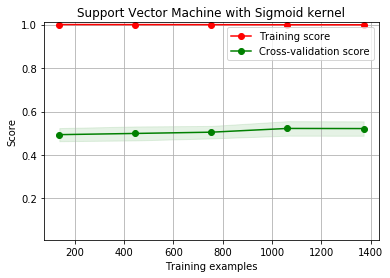

In [55]:
makeLearningCurve(mySVMRBF, "Support Vector Machine with Sigmoid kernel")

# k-Nearest Neighbors

In [56]:
trainingScores = []
testingScore = []
map = {}

for i in range(1,600):
    classifier = neighbors.KNeighborsClassifier(n_neighbors=i)
    t1 = time.time()
    classifier.fit(x_train,y_train)
    t2 = time.time()
    trainingScores.append(classifier.score(x_train, y_train))
    testingScore.append(classifier.score(x_test, y_test))
    concentrationMaker(classifier, ("knn with {} neighbors".format(i)))
    print("Training Time of KNeighbors with {} neighbors: ".format(i),(t2-t1))
    map[i] = (t2 - t1)
    print("\n\n")
    
    
    

Analysis of knn with 1 neighbors: 

Testing Score: 0.5544554455445545 and Training Score: 0.9982497082847142
Training Error: 0.0017502917152858455
Testing Error: 0.4455445544554455
Confusion Matrix
[[84 61]
 [74 84]]
Total:  303
Correct Positives  84
Correct Negatives  84
False Positives:  61
False Negatives:  74
Training Time of KNeighbors with 1 neighbors:  0.00840902328491211



Analysis of knn with 2 neighbors: 

Testing Score: 0.5214521452145214 and Training Score: 0.7812135355892649
Training Error: 0.21878646441073513
Testing Error: 0.47854785478547857
Confusion Matrix
[[119  26]
 [119  39]]
Total:  303
Correct Positives  119
Correct Negatives  39
False Positives:  26
False Negatives:  119
Training Time of KNeighbors with 2 neighbors:  0.006211042404174805



Analysis of knn with 3 neighbors: 

Testing Score: 0.5379537953795379 and Training Score: 0.7718786464410735
Training Error: 0.2281213535589265
Testing Error: 0.4620462046204621
Confusion Matrix
[[89 56]
 [84 74]]
Total:  30

Analysis of knn with 24 neighbors: 

Testing Score: 0.5115511551155115 and Training Score: 0.6429404900816803
Training Error: 0.3570595099183197
Testing Error: 0.4884488448844885
Confusion Matrix
[[96 49]
 [99 59]]
Total:  303
Correct Positives  96
Correct Negatives  59
False Positives:  49
False Negatives:  99
Training Time of KNeighbors with 24 neighbors:  0.0020318031311035156



Analysis of knn with 25 neighbors: 

Testing Score: 0.5082508250825083 and Training Score: 0.6406067677946324
Training Error: 0.35939323220536756
Testing Error: 0.4917491749174917
Confusion Matrix
[[91 54]
 [95 63]]
Total:  303
Correct Positives  91
Correct Negatives  63
False Positives:  54
False Negatives:  95
Training Time of KNeighbors with 25 neighbors:  0.0033359527587890625



Analysis of knn with 26 neighbors: 

Testing Score: 0.49504950495049505 and Training Score: 0.6394399066511085
Training Error: 0.3605600933488915
Testing Error: 0.504950495049505
Confusion Matrix
[[ 96  49]
 [104  54]]
Total:  

Analysis of knn with 46 neighbors: 

Testing Score: 0.5412541254125413 and Training Score: 0.6277712952158693
Training Error: 0.3722287047841307
Testing Error: 0.45874587458745875
Confusion Matrix
[[102  43]
 [ 96  62]]
Total:  303
Correct Positives  102
Correct Negatives  62
False Positives:  43
False Negatives:  96
Training Time of KNeighbors with 46 neighbors:  0.005170106887817383



Analysis of knn with 47 neighbors: 

Testing Score: 0.5214521452145214 and Training Score: 0.6242707117852976
Training Error: 0.3757292882147024
Testing Error: 0.47854785478547857
Confusion Matrix
[[93 52]
 [93 65]]
Total:  303
Correct Positives  93
Correct Negatives  65
False Positives:  52
False Negatives:  93
Training Time of KNeighbors with 47 neighbors:  0.0021867752075195312



Analysis of knn with 48 neighbors: 

Testing Score: 0.5313531353135313 and Training Score: 0.6283547257876313
Training Error: 0.3716452742123687
Testing Error: 0.46864686468646866
Confusion Matrix
[[98 47]
 [95 63]]
Total:

Analysis of knn with 68 neighbors: 

Testing Score: 0.5379537953795379 and Training Score: 0.617269544924154
Training Error: 0.382730455075846
Testing Error: 0.4620462046204621
Confusion Matrix
[[93 52]
 [88 70]]
Total:  303
Correct Positives  93
Correct Negatives  70
False Positives:  52
False Negatives:  88
Training Time of KNeighbors with 68 neighbors:  0.006597757339477539



Analysis of knn with 69 neighbors: 

Testing Score: 0.5478547854785478 and Training Score: 0.6161026837806302
Training Error: 0.38389731621936984
Testing Error: 0.4521452145214522
Confusion Matrix
[[88 57]
 [80 78]]
Total:  303
Correct Positives  88
Correct Negatives  78
False Positives:  57
False Negatives:  80
Training Time of KNeighbors with 69 neighbors:  0.005039215087890625



Analysis of knn with 70 neighbors: 

Testing Score: 0.5247524752475248 and Training Score: 0.6207701283547258
Training Error: 0.3792298716452742
Testing Error: 0.4752475247524752
Confusion Matrix
[[90 55]
 [89 69]]
Total:  303
Corr

Analysis of knn with 90 neighbors: 

Testing Score: 0.5247524752475248 and Training Score: 0.6096849474912486
Training Error: 0.3903150525087514
Testing Error: 0.4752475247524752
Confusion Matrix
[[89 56]
 [88 70]]
Total:  303
Correct Positives  89
Correct Negatives  70
False Positives:  56
False Negatives:  88
Training Time of KNeighbors with 90 neighbors:  0.0028600692749023438



Analysis of knn with 91 neighbors: 

Testing Score: 0.5346534653465347 and Training Score: 0.6108518086347725
Training Error: 0.3891481913652275
Testing Error: 0.4653465346534653
Confusion Matrix
[[89 56]
 [85 73]]
Total:  303
Correct Positives  89
Correct Negatives  73
False Positives:  56
False Negatives:  85
Training Time of KNeighbors with 91 neighbors:  0.0026760101318359375



Analysis of knn with 92 neighbors: 

Testing Score: 0.528052805280528 and Training Score: 0.6126021003500584
Training Error: 0.38739789964994165
Testing Error: 0.471947194719472
Confusion Matrix
[[90 55]
 [88 70]]
Total:  303
Co

Analysis of knn with 113 neighbors: 

Testing Score: 0.5181518151815182 and Training Score: 0.6102683780630105
Training Error: 0.3897316219369895
Testing Error: 0.4818481848184818
Confusion Matrix
[[92 53]
 [93 65]]
Total:  303
Correct Positives  92
Correct Negatives  65
False Positives:  53
False Negatives:  93
Training Time of KNeighbors with 113 neighbors:  0.002148151397705078



Analysis of knn with 114 neighbors: 

Testing Score: 0.5181518151815182 and Training Score: 0.6067677946324388
Training Error: 0.3932322053675612
Testing Error: 0.4818481848184818
Confusion Matrix
[[92 53]
 [93 65]]
Total:  303
Correct Positives  92
Correct Negatives  65
False Positives:  53
False Negatives:  93
Training Time of KNeighbors with 114 neighbors:  0.0024919509887695312



Analysis of knn with 115 neighbors: 

Testing Score: 0.5214521452145214 and Training Score: 0.6061843640606768
Training Error: 0.3938156359393232
Testing Error: 0.47854785478547857
Confusion Matrix
[[91 54]
 [91 67]]
Total:  

Analysis of knn with 135 neighbors: 

Testing Score: 0.5247524752475248 and Training Score: 0.6091015169194866
Training Error: 0.39089848308051345
Testing Error: 0.4752475247524752
Confusion Matrix
[[91 54]
 [90 68]]
Total:  303
Correct Positives  91
Correct Negatives  68
False Positives:  54
False Negatives:  90
Training Time of KNeighbors with 135 neighbors:  0.0025091171264648438



Analysis of knn with 136 neighbors: 

Testing Score: 0.5214521452145214 and Training Score: 0.6108518086347725
Training Error: 0.3891481913652275
Testing Error: 0.47854785478547857
Confusion Matrix
[[91 54]
 [91 67]]
Total:  303
Correct Positives  91
Correct Negatives  67
False Positives:  54
False Negatives:  91
Training Time of KNeighbors with 136 neighbors:  0.002737283706665039



Analysis of knn with 137 neighbors: 

Testing Score: 0.5247524752475248 and Training Score: 0.6108518086347725
Training Error: 0.3891481913652275
Testing Error: 0.4752475247524752
Confusion Matrix
[[90 55]
 [89 69]]
Total: 

Analysis of knn with 157 neighbors: 

Testing Score: 0.5478547854785478 and Training Score: 0.6021003500583431
Training Error: 0.39789964994165694
Testing Error: 0.4521452145214522
Confusion Matrix
[[97 48]
 [89 69]]
Total:  303
Correct Positives  97
Correct Negatives  69
False Positives:  48
False Negatives:  89
Training Time of KNeighbors with 157 neighbors:  0.0061948299407958984



Analysis of knn with 158 neighbors: 

Testing Score: 0.5478547854785478 and Training Score: 0.6003500583430572
Training Error: 0.3996499416569428
Testing Error: 0.4521452145214522
Confusion Matrix
[[98 47]
 [90 68]]
Total:  303
Correct Positives  98
Correct Negatives  68
False Positives:  47
False Negatives:  90
Training Time of KNeighbors with 158 neighbors:  0.0037949085235595703



Analysis of knn with 159 neighbors: 

Testing Score: 0.5478547854785478 and Training Score: 0.6009334889148191
Training Error: 0.3990665110851809
Testing Error: 0.4521452145214522
Confusion Matrix
[[97 48]
 [89 69]]
Total: 

Analysis of knn with 178 neighbors: 

Testing Score: 0.5544554455445545 and Training Score: 0.6021003500583431
Training Error: 0.39789964994165694
Testing Error: 0.4455445544554455
Confusion Matrix
[[101  44]
 [ 91  67]]
Total:  303
Correct Positives  101
Correct Negatives  67
False Positives:  44
False Negatives:  91
Training Time of KNeighbors with 178 neighbors:  0.002496004104614258



Analysis of knn with 179 neighbors: 

Testing Score: 0.5577557755775577 and Training Score: 0.602683780630105
Training Error: 0.39731621936989503
Testing Error: 0.44224422442244227
Confusion Matrix
[[101  44]
 [ 90  68]]
Total:  303
Correct Positives  101
Correct Negatives  68
False Positives:  44
False Negatives:  90
Training Time of KNeighbors with 179 neighbors:  0.0035309791564941406



Analysis of knn with 180 neighbors: 

Testing Score: 0.5577557755775577 and Training Score: 0.5997666277712952
Training Error: 0.4002333722287048
Testing Error: 0.44224422442244227
Confusion Matrix
[[102  43]
 [ 9

Analysis of knn with 199 neighbors: 

Testing Score: 0.5577557755775577 and Training Score: 0.602683780630105
Training Error: 0.39731621936989503
Testing Error: 0.44224422442244227
Confusion Matrix
[[104  41]
 [ 93  65]]
Total:  303
Correct Positives  104
Correct Negatives  65
False Positives:  41
False Negatives:  93
Training Time of KNeighbors with 199 neighbors:  0.002768993377685547



Analysis of knn with 200 neighbors: 

Testing Score: 0.5577557755775577 and Training Score: 0.6009334889148191
Training Error: 0.3990665110851809
Testing Error: 0.44224422442244227
Confusion Matrix
[[104  41]
 [ 93  65]]
Total:  303
Correct Positives  104
Correct Negatives  65
False Positives:  41
False Negatives:  93
Training Time of KNeighbors with 200 neighbors:  0.0027570724487304688



Analysis of knn with 201 neighbors: 

Testing Score: 0.5511551155115512 and Training Score: 0.602683780630105
Training Error: 0.39731621936989503
Testing Error: 0.44884488448844884
Confusion Matrix
[[102  43]
 [ 9

Analysis of knn with 220 neighbors: 

Testing Score: 0.5445544554455446 and Training Score: 0.603267211201867
Training Error: 0.396732788798133
Testing Error: 0.4554455445544554
Confusion Matrix
[[106  39]
 [ 99  59]]
Total:  303
Correct Positives  106
Correct Negatives  59
False Positives:  39
False Negatives:  99
Training Time of KNeighbors with 220 neighbors:  0.006770133972167969



Analysis of knn with 221 neighbors: 

Testing Score: 0.5478547854785478 and Training Score: 0.6021003500583431
Training Error: 0.39789964994165694
Testing Error: 0.4521452145214522
Confusion Matrix
[[104  41]
 [ 96  62]]
Total:  303
Correct Positives  104
Correct Negatives  62
False Positives:  41
False Negatives:  96
Training Time of KNeighbors with 221 neighbors:  0.008539199829101562



Analysis of knn with 222 neighbors: 

Testing Score: 0.5412541254125413 and Training Score: 0.6021003500583431
Training Error: 0.39789964994165694
Testing Error: 0.45874587458745875
Confusion Matrix
[[106  39]
 [100  

Analysis of knn with 241 neighbors: 

Testing Score: 0.5346534653465347 and Training Score: 0.602683780630105
Training Error: 0.39731621936989503
Testing Error: 0.4653465346534653
Confusion Matrix
[[106  39]
 [102  56]]
Total:  303
Correct Positives  106
Correct Negatives  56
False Positives:  39
False Negatives:  102
Training Time of KNeighbors with 241 neighbors:  0.0035200119018554688



Analysis of knn with 242 neighbors: 

Testing Score: 0.5346534653465347 and Training Score: 0.6003500583430572
Training Error: 0.3996499416569428
Testing Error: 0.4653465346534653
Confusion Matrix
[[106  39]
 [102  56]]
Total:  303
Correct Positives  106
Correct Negatives  56
False Positives:  39
False Negatives:  102
Training Time of KNeighbors with 242 neighbors:  0.002068042755126953



Analysis of knn with 243 neighbors: 

Testing Score: 0.5379537953795379 and Training Score: 0.6021003500583431
Training Error: 0.39789964994165694
Testing Error: 0.4620462046204621
Confusion Matrix
[[106  39]
 [10

Analysis of knn with 262 neighbors: 

Testing Score: 0.5346534653465347 and Training Score: 0.5991831971995333
Training Error: 0.4008168028004667
Testing Error: 0.4653465346534653
Confusion Matrix
[[106  39]
 [102  56]]
Total:  303
Correct Positives  106
Correct Negatives  56
False Positives:  39
False Negatives:  102
Training Time of KNeighbors with 262 neighbors:  0.002568960189819336



Analysis of knn with 263 neighbors: 

Testing Score: 0.5346534653465347 and Training Score: 0.6003500583430572
Training Error: 0.3996499416569428
Testing Error: 0.4653465346534653
Confusion Matrix
[[106  39]
 [102  56]]
Total:  303
Correct Positives  106
Correct Negatives  56
False Positives:  39
False Negatives:  102
Training Time of KNeighbors with 263 neighbors:  0.0026826858520507812



Analysis of knn with 264 neighbors: 

Testing Score: 0.5313531353135313 and Training Score: 0.5980163360560093
Training Error: 0.40198366394399065
Testing Error: 0.46864686468646866
Confusion Matrix
[[106  39]
 [1

Analysis of knn with 283 neighbors: 

Testing Score: 0.5379537953795379 and Training Score: 0.5985997666277713
Training Error: 0.40140023337222874
Testing Error: 0.4620462046204621
Confusion Matrix
[[107  38]
 [102  56]]
Total:  303
Correct Positives  107
Correct Negatives  56
False Positives:  38
False Negatives:  102
Training Time of KNeighbors with 283 neighbors:  0.0025222301483154297



Analysis of knn with 284 neighbors: 

Testing Score: 0.5346534653465347 and Training Score: 0.5962660443407235
Training Error: 0.4037339556592765
Testing Error: 0.4653465346534653
Confusion Matrix
[[108  37]
 [104  54]]
Total:  303
Correct Positives  108
Correct Negatives  54
False Positives:  37
False Negatives:  104
Training Time of KNeighbors with 284 neighbors:  0.002732992172241211



Analysis of knn with 285 neighbors: 

Testing Score: 0.5379537953795379 and Training Score: 0.5980163360560093
Training Error: 0.40198366394399065
Testing Error: 0.4620462046204621
Confusion Matrix
[[107  38]
 [1

Analysis of knn with 304 neighbors: 

Testing Score: 0.5346534653465347 and Training Score: 0.5921820303383898
Training Error: 0.4078179696616102
Testing Error: 0.4653465346534653
Confusion Matrix
[[110  35]
 [106  52]]
Total:  303
Correct Positives  110
Correct Negatives  52
False Positives:  35
False Negatives:  106
Training Time of KNeighbors with 304 neighbors:  0.003301858901977539



Analysis of knn with 305 neighbors: 

Testing Score: 0.5346534653465347 and Training Score: 0.5915985997666278
Training Error: 0.40840140023337224
Testing Error: 0.4653465346534653
Confusion Matrix
[[110  35]
 [106  52]]
Total:  303
Correct Positives  110
Correct Negatives  52
False Positives:  35
False Negatives:  106
Training Time of KNeighbors with 305 neighbors:  0.0032110214233398438



Analysis of knn with 306 neighbors: 

Testing Score: 0.5346534653465347 and Training Score: 0.5915985997666278
Training Error: 0.40840140023337224
Testing Error: 0.4653465346534653
Confusion Matrix
[[110  35]
 [1

Analysis of knn with 325 neighbors: 

Testing Score: 0.5313531353135313 and Training Score: 0.5781796966161027
Training Error: 0.4218203033838973
Testing Error: 0.46864686468646866
Confusion Matrix
[[114  31]
 [111  47]]
Total:  303
Correct Positives  114
Correct Negatives  47
False Positives:  31
False Negatives:  111
Training Time of KNeighbors with 325 neighbors:  0.0049152374267578125



Analysis of knn with 326 neighbors: 

Testing Score: 0.5313531353135313 and Training Score: 0.5781796966161027
Training Error: 0.4218203033838973
Testing Error: 0.46864686468646866
Confusion Matrix
[[114  31]
 [111  47]]
Total:  303
Correct Positives  114
Correct Negatives  47
False Positives:  31
False Negatives:  111
Training Time of KNeighbors with 326 neighbors:  0.003380298614501953



Analysis of knn with 327 neighbors: 

Testing Score: 0.5313531353135313 and Training Score: 0.5787631271878646
Training Error: 0.4212368728121354
Testing Error: 0.46864686468646866
Confusion Matrix
[[114  31]
 [

Analysis of knn with 346 neighbors: 

Testing Score: 0.5313531353135313 and Training Score: 0.5781796966161027
Training Error: 0.4218203033838973
Testing Error: 0.46864686468646866
Confusion Matrix
[[114  31]
 [111  47]]
Total:  303
Correct Positives  114
Correct Negatives  47
False Positives:  31
False Negatives:  111
Training Time of KNeighbors with 346 neighbors:  0.0028650760650634766



Analysis of knn with 347 neighbors: 

Testing Score: 0.5313531353135313 and Training Score: 0.5775962660443408
Training Error: 0.4224037339556592
Testing Error: 0.46864686468646866
Confusion Matrix
[[114  31]
 [111  47]]
Total:  303
Correct Positives  114
Correct Negatives  47
False Positives:  31
False Negatives:  111
Training Time of KNeighbors with 347 neighbors:  0.002017974853515625



Analysis of knn with 348 neighbors: 

Testing Score: 0.5313531353135313 and Training Score: 0.5787631271878646
Training Error: 0.4212368728121354
Testing Error: 0.46864686468646866
Confusion Matrix
[[114  31]
 [

Analysis of knn with 367 neighbors: 

Testing Score: 0.5313531353135313 and Training Score: 0.5793465577596266
Training Error: 0.4206534422403734
Testing Error: 0.46864686468646866
Confusion Matrix
[[114  31]
 [111  47]]
Total:  303
Correct Positives  114
Correct Negatives  47
False Positives:  31
False Negatives:  111
Training Time of KNeighbors with 367 neighbors:  0.002505064010620117



Analysis of knn with 368 neighbors: 

Testing Score: 0.5313531353135313 and Training Score: 0.5787631271878646
Training Error: 0.4212368728121354
Testing Error: 0.46864686468646866
Confusion Matrix
[[114  31]
 [111  47]]
Total:  303
Correct Positives  114
Correct Negatives  47
False Positives:  31
False Negatives:  111
Training Time of KNeighbors with 368 neighbors:  0.0029633045196533203



Analysis of knn with 369 neighbors: 

Testing Score: 0.5313531353135313 and Training Score: 0.5793465577596266
Training Error: 0.4206534422403734
Testing Error: 0.46864686468646866
Confusion Matrix
[[114  31]
 [

Analysis of knn with 388 neighbors: 

Testing Score: 0.5313531353135313 and Training Score: 0.5787631271878646
Training Error: 0.4212368728121354
Testing Error: 0.46864686468646866
Confusion Matrix
[[114  31]
 [111  47]]
Total:  303
Correct Positives  114
Correct Negatives  47
False Positives:  31
False Negatives:  111
Training Time of KNeighbors with 388 neighbors:  0.002319812774658203



Analysis of knn with 389 neighbors: 

Testing Score: 0.5313531353135313 and Training Score: 0.5793465577596266
Training Error: 0.4206534422403734
Testing Error: 0.46864686468646866
Confusion Matrix
[[114  31]
 [111  47]]
Total:  303
Correct Positives  114
Correct Negatives  47
False Positives:  31
False Negatives:  111
Training Time of KNeighbors with 389 neighbors:  0.0063130855560302734



Analysis of knn with 390 neighbors: 

Testing Score: 0.5313531353135313 and Training Score: 0.5793465577596266
Training Error: 0.4206534422403734
Testing Error: 0.46864686468646866
Confusion Matrix
[[114  31]
 [

Analysis of knn with 409 neighbors: 

Testing Score: 0.5412541254125413 and Training Score: 0.5840140023337222
Training Error: 0.41598599766627775
Testing Error: 0.45874587458745875
Confusion Matrix
[[114  31]
 [108  50]]
Total:  303
Correct Positives  114
Correct Negatives  50
False Positives:  31
False Negatives:  108
Training Time of KNeighbors with 409 neighbors:  0.00333404541015625



Analysis of knn with 410 neighbors: 

Testing Score: 0.5412541254125413 and Training Score: 0.5828471411901983
Training Error: 0.4171528588098017
Testing Error: 0.45874587458745875
Confusion Matrix
[[114  31]
 [108  50]]
Total:  303
Correct Positives  114
Correct Negatives  50
False Positives:  31
False Negatives:  108
Training Time of KNeighbors with 410 neighbors:  0.003072023391723633



Analysis of knn with 411 neighbors: 

Testing Score: 0.5412541254125413 and Training Score: 0.5851808634772462
Training Error: 0.4148191365227538
Testing Error: 0.45874587458745875
Confusion Matrix
[[114  31]
 [1

Analysis of knn with 430 neighbors: 

Testing Score: 0.5445544554455446 and Training Score: 0.5857642940490082
Training Error: 0.4142357059509918
Testing Error: 0.4554455445544554
Confusion Matrix
[[117  28]
 [110  48]]
Total:  303
Correct Positives  117
Correct Negatives  48
False Positives:  28
False Negatives:  110
Training Time of KNeighbors with 430 neighbors:  0.003134012222290039



Analysis of knn with 431 neighbors: 

Testing Score: 0.5412541254125413 and Training Score: 0.5845974329054843
Training Error: 0.41540256709451573
Testing Error: 0.45874587458745875
Confusion Matrix
[[116  29]
 [110  48]]
Total:  303
Correct Positives  116
Correct Negatives  48
False Positives:  29
False Negatives:  110
Training Time of KNeighbors with 431 neighbors:  0.0030829906463623047



Analysis of knn with 432 neighbors: 

Testing Score: 0.5445544554455446 and Training Score: 0.5863477246207701
Training Error: 0.4136522753792299
Testing Error: 0.4554455445544554
Confusion Matrix
[[117  28]
 [1

Analysis of knn with 451 neighbors: 

Testing Score: 0.5478547854785478 and Training Score: 0.5845974329054843
Training Error: 0.41540256709451573
Testing Error: 0.4521452145214522
Confusion Matrix
[[115  30]
 [107  51]]
Total:  303
Correct Positives  115
Correct Negatives  51
False Positives:  30
False Negatives:  107
Training Time of KNeighbors with 451 neighbors:  0.0029752254486083984



Analysis of knn with 452 neighbors: 

Testing Score: 0.5478547854785478 and Training Score: 0.5857642940490082
Training Error: 0.4142357059509918
Testing Error: 0.4521452145214522
Confusion Matrix
[[115  30]
 [107  51]]
Total:  303
Correct Positives  115
Correct Negatives  51
False Positives:  30
False Negatives:  107
Training Time of KNeighbors with 452 neighbors:  0.0028769969940185547



Analysis of knn with 453 neighbors: 

Testing Score: 0.5478547854785478 and Training Score: 0.5845974329054843
Training Error: 0.41540256709451573
Testing Error: 0.4521452145214522
Confusion Matrix
[[115  30]
 [

Analysis of knn with 472 neighbors: 

Testing Score: 0.5445544554455446 and Training Score: 0.5863477246207701
Training Error: 0.4136522753792299
Testing Error: 0.4554455445544554
Confusion Matrix
[[114  31]
 [107  51]]
Total:  303
Correct Positives  114
Correct Negatives  51
False Positives:  31
False Negatives:  107
Training Time of KNeighbors with 472 neighbors:  0.0029821395874023438



Analysis of knn with 473 neighbors: 

Testing Score: 0.5445544554455446 and Training Score: 0.5863477246207701
Training Error: 0.4136522753792299
Testing Error: 0.4554455445544554
Confusion Matrix
[[114  31]
 [107  51]]
Total:  303
Correct Positives  114
Correct Negatives  51
False Positives:  31
False Negatives:  107
Training Time of KNeighbors with 473 neighbors:  0.008089065551757812



Analysis of knn with 474 neighbors: 

Testing Score: 0.5478547854785478 and Training Score: 0.5851808634772462
Training Error: 0.4148191365227538
Testing Error: 0.4521452145214522
Confusion Matrix
[[115  30]
 [107

Analysis of knn with 493 neighbors: 

Testing Score: 0.5445544554455446 and Training Score: 0.5845974329054843
Training Error: 0.41540256709451573
Testing Error: 0.4554455445544554
Confusion Matrix
[[114  31]
 [107  51]]
Total:  303
Correct Positives  114
Correct Negatives  51
False Positives:  31
False Negatives:  107
Training Time of KNeighbors with 493 neighbors:  0.0024809837341308594



Analysis of knn with 494 neighbors: 

Testing Score: 0.5445544554455446 and Training Score: 0.5857642940490082
Training Error: 0.4142357059509918
Testing Error: 0.4554455445544554
Confusion Matrix
[[114  31]
 [107  51]]
Total:  303
Correct Positives  114
Correct Negatives  51
False Positives:  31
False Negatives:  107
Training Time of KNeighbors with 494 neighbors:  0.003242969512939453



Analysis of knn with 495 neighbors: 

Testing Score: 0.5445544554455446 and Training Score: 0.5845974329054843
Training Error: 0.41540256709451573
Testing Error: 0.4554455445544554
Confusion Matrix
[[114  31]
 [1

Analysis of knn with 514 neighbors: 

Testing Score: 0.5313531353135313 and Training Score: 0.5857642940490082
Training Error: 0.4142357059509918
Testing Error: 0.46864686468646866
Confusion Matrix
[[115  30]
 [112  46]]
Total:  303
Correct Positives  115
Correct Negatives  46
False Positives:  30
False Negatives:  112
Training Time of KNeighbors with 514 neighbors:  0.008496999740600586



Analysis of knn with 515 neighbors: 

Testing Score: 0.5346534653465347 and Training Score: 0.588098016336056
Training Error: 0.41190198366394404
Testing Error: 0.4653465346534653
Confusion Matrix
[[115  30]
 [111  47]]
Total:  303
Correct Positives  115
Correct Negatives  47
False Positives:  30
False Negatives:  111
Training Time of KNeighbors with 515 neighbors:  0.0037970542907714844



Analysis of knn with 516 neighbors: 

Testing Score: 0.5379537953795379 and Training Score: 0.5892648774795799
Training Error: 0.4107351225204201
Testing Error: 0.4620462046204621
Confusion Matrix
[[116  29]
 [11

Analysis of knn with 535 neighbors: 

Testing Score: 0.5412541254125413 and Training Score: 0.5845974329054843
Training Error: 0.41540256709451573
Testing Error: 0.45874587458745875
Confusion Matrix
[[116  29]
 [110  48]]
Total:  303
Correct Positives  116
Correct Negatives  48
False Positives:  29
False Negatives:  110
Training Time of KNeighbors with 535 neighbors:  0.00688481330871582



Analysis of knn with 536 neighbors: 

Testing Score: 0.5379537953795379 and Training Score: 0.5834305717619603
Training Error: 0.41656942823803966
Testing Error: 0.4620462046204621
Confusion Matrix
[[116  29]
 [111  47]]
Total:  303
Correct Positives  116
Correct Negatives  47
False Positives:  29
False Negatives:  111
Training Time of KNeighbors with 536 neighbors:  0.003141164779663086



Analysis of knn with 537 neighbors: 

Testing Score: 0.5412541254125413 and Training Score: 0.5845974329054843
Training Error: 0.41540256709451573
Testing Error: 0.45874587458745875
Confusion Matrix
[[116  29]
 [

Analysis of knn with 556 neighbors: 

Testing Score: 0.5346534653465347 and Training Score: 0.5840140023337222
Training Error: 0.41598599766627775
Testing Error: 0.4653465346534653
Confusion Matrix
[[118  27]
 [114  44]]
Total:  303
Correct Positives  118
Correct Negatives  44
False Positives:  27
False Negatives:  114
Training Time of KNeighbors with 556 neighbors:  0.003184795379638672



Analysis of knn with 557 neighbors: 

Testing Score: 0.5412541254125413 and Training Score: 0.5828471411901983
Training Error: 0.4171528588098017
Testing Error: 0.45874587458745875
Confusion Matrix
[[118  27]
 [112  46]]
Total:  303
Correct Positives  118
Correct Negatives  46
False Positives:  27
False Negatives:  112
Training Time of KNeighbors with 557 neighbors:  0.003353118896484375



Analysis of knn with 558 neighbors: 

Testing Score: 0.5346534653465347 and Training Score: 0.5828471411901983
Training Error: 0.4171528588098017
Testing Error: 0.4653465346534653
Confusion Matrix
[[118  27]
 [11

Analysis of knn with 577 neighbors: 

Testing Score: 0.5379537953795379 and Training Score: 0.5793465577596266
Training Error: 0.4206534422403734
Testing Error: 0.4620462046204621
Confusion Matrix
[[119  26]
 [114  44]]
Total:  303
Correct Positives  119
Correct Negatives  44
False Positives:  26
False Negatives:  114
Training Time of KNeighbors with 577 neighbors:  0.008515119552612305



Analysis of knn with 578 neighbors: 

Testing Score: 0.5379537953795379 and Training Score: 0.5805134189031506
Training Error: 0.41948658109684944
Testing Error: 0.4620462046204621
Confusion Matrix
[[119  26]
 [114  44]]
Total:  303
Correct Positives  119
Correct Negatives  44
False Positives:  26
False Negatives:  114
Training Time of KNeighbors with 578 neighbors:  0.0027379989624023438



Analysis of knn with 579 neighbors: 

Testing Score: 0.5379537953795379 and Training Score: 0.5781796966161027
Training Error: 0.4218203033838973
Testing Error: 0.4620462046204621
Confusion Matrix
[[118  27]
 [11

Analysis of knn with 598 neighbors: 

Testing Score: 0.5346534653465347 and Training Score: 0.5810968494749125
Training Error: 0.41890315052508753
Testing Error: 0.4653465346534653
Confusion Matrix
[[118  27]
 [114  44]]
Total:  303
Correct Positives  118
Correct Negatives  44
False Positives:  27
False Negatives:  114
Training Time of KNeighbors with 598 neighbors:  0.003016948699951172



Analysis of knn with 599 neighbors: 

Testing Score: 0.5346534653465347 and Training Score: 0.5810968494749125
Training Error: 0.41890315052508753
Testing Error: 0.4653465346534653
Confusion Matrix
[[118  27]
 [114  44]]
Total:  303
Correct Positives  118
Correct Negatives  44
False Positives:  27
False Negatives:  114
Training Time of KNeighbors with 599 neighbors:  0.0026938915252685547





Text(0.5, 1.0, 'KNN: Number of Neighbors vs. Testing Score')

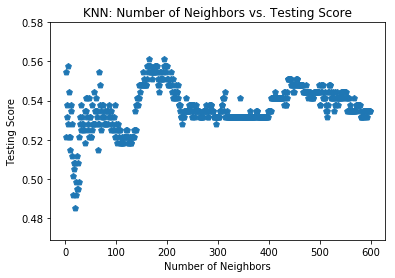

In [57]:
x = range(1,600)
y = testingScore

plt.scatter(x, y, marker='p')
plt.xlabel("Number of Neighbors")
plt.ylabel("Testing Score")
plt.title("KNN: Number of Neighbors vs. Testing Score")

Text(0.5, 1.0, 'KNN: Number of Neighbors vs. Training Score')

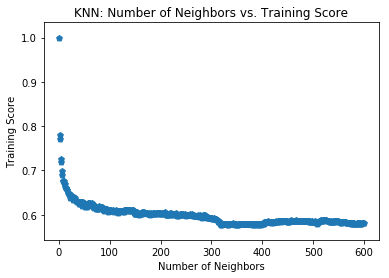

In [58]:
x = range(1,600)
y = trainingScores

plt.scatter(x, y, marker='p')
plt.xlabel("Number of Neighbors")
plt.ylabel("Training Score")
plt.title("KNN: Number of Neighbors vs. Training Score")

In [59]:
classifier = neighbors.KNeighborsClassifier(n_neighbors=70)
classifier.fit(x_train,y_train)
concentrationMaker(classifier, "knn with 70 neighbors, (highest accuracy)")


Analysis of knn with 70 neighbors, (highest accuracy): 

Testing Score: 0.5247524752475248 and Training Score: 0.6207701283547258
Training Error: 0.3792298716452742
Testing Error: 0.4752475247524752
Confusion Matrix
[[90 55]
 [89 69]]
Total:  303
Correct Positives  90
Correct Negatives  69
False Positives:  55
False Negatives:  89


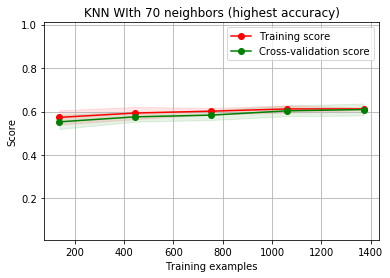

In [60]:
makeLearningCurve(classifier, "KNN WIth 70 neighbors (highest accuracy)")

In [61]:
classifier = neighbors.KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train,y_train)
concentrationMaker(classifier, "knn with 3 neighbors, (least accuracy)")

Analysis of knn with 3 neighbors, (least accuracy): 

Testing Score: 0.5379537953795379 and Training Score: 0.7718786464410735
Training Error: 0.2281213535589265
Testing Error: 0.4620462046204621
Confusion Matrix
[[89 56]
 [84 74]]
Total:  303
Correct Positives  89
Correct Negatives  74
False Positives:  56
False Negatives:  84


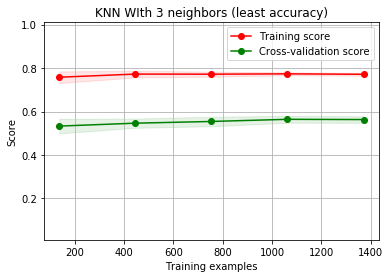

In [62]:
makeLearningCurve(classifier, "KNN WIth 3 neighbors (least accuracy)")

Text(0.5, 1.0, 'KNN: Number of Neighbors vs. Training Time')

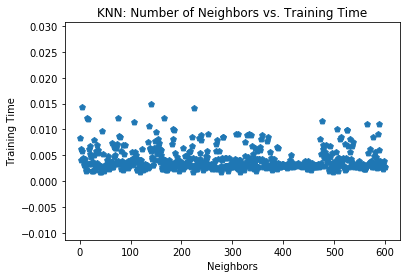

In [63]:
x = map.keys()
y = []
for key in x:
    y.append(map[key])
plt.scatter(x, y, marker='p')
plt.xlabel("Neighbors")
plt.ylabel("Training Time")
plt.title("KNN: Number of Neighbors vs. Training Time")
